In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tarfile


# Path to the .tgz file
tgz_file_path = r"C:\Users\SOOQ ELASER\LanguageTranslation\fr-en.tgz"

# Extract the .tgz file
with tarfile.open(tgz_file_path, "r:gz") as tar:
    tar.extractall(path=r"C:\Users\SOOQ ELASER\LanguageTranslation\extracted")  # Specify an extraction folder


C:\Users\SOOQ ELASER\AppData\Local\Temp\ipykernel_60140\3468146672.py:9: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=r"C:\Users\SOOQ ELASER\LanguageTranslation\extracted")  # Specify an extraction folder


In [5]:


# Paths to the extracted files
french_file_path = r"C:\Users\SOOQ ELASER\LanguageTranslation\extracted\europarl-v7.fr-en.fr"
english_file_path = r"C:\Users\SOOQ ELASER\LanguageTranslation\extracted\europarl-v7.fr-en.en"

# Load the data
with open(french_file_path, "r", encoding="utf-8") as fr_file, open(english_file_path, "r", encoding="utf-8") as en_file:
    french_sentences = fr_file.readlines()
    english_sentences = en_file.readlines()

# Create a DataFrame
df = pd.DataFrame({
    "French": [line.strip() for line in french_sentences],
    "English": [line.strip() for line in english_sentences]
})

# Display the first few rows
print(df.head())

# Save to CSV for future use (optional)
df.to_csv(r"C:\Users\SOOQ ELASER\LanguageTranslation\extracted\parallel_corpus.csv", index=False)


                                              French  \
0                              Reprise de la session   
1  Je déclare reprise la session du Parlement eur...   
2  Comme vous avez pu le constater, le grand "bog...   
3  Vous avez souhaité un débat à ce sujet dans le...   
4  En attendant, je souhaiterais, comme un certai...   

                                             English  
0                          Resumption of the session  
1  I declare resumed the session of the European ...  
2  Although, as you will have seen, the dreaded '...  
3  You have requested a debate on this subject in...  
4  In the meantime, I should like to observe a mi...  


In [6]:
df.head()

,French,English
0,Reprise de la session,Resumption of the session
1,Je déclare reprise la session du Parlement eur...,I declare resumed the session of the European ...
2,"Comme vous avez pu le constater, le grand ""bog...","Although, as you will have seen, the dreaded '..."
3,Vous avez souhaité un débat à ce sujet dans le...,You have requested a debate on this subject in...
4,"En attendant, je souhaiterais, comme un certai...","In the meantime, I should like to observe a mi..."


In [8]:
df.shape

(2007723, 2)

In [9]:
df.describe()

,French,English
count,2007723,2007723
unique,1954562,1953216
top,Le débat est clos.,The debate is closed.
freq,3937,4407


In [11]:
unique_french_sentences = df['French'].nunique()
unique_english_sentences = df['English'].nunique()
print(f"Unique French Sentences: {unique_french_sentences}")
print(f"Unique English Sentences: {unique_english_sentences}")

Unique French Sentences: 1954562
Unique English Sentences: 1953216


In [12]:
print("\nMissing Data Check:")
missing_data = df.isnull().sum()
print(missing_data)


Missing Data Check:
French     0
English    0
dtype: int64


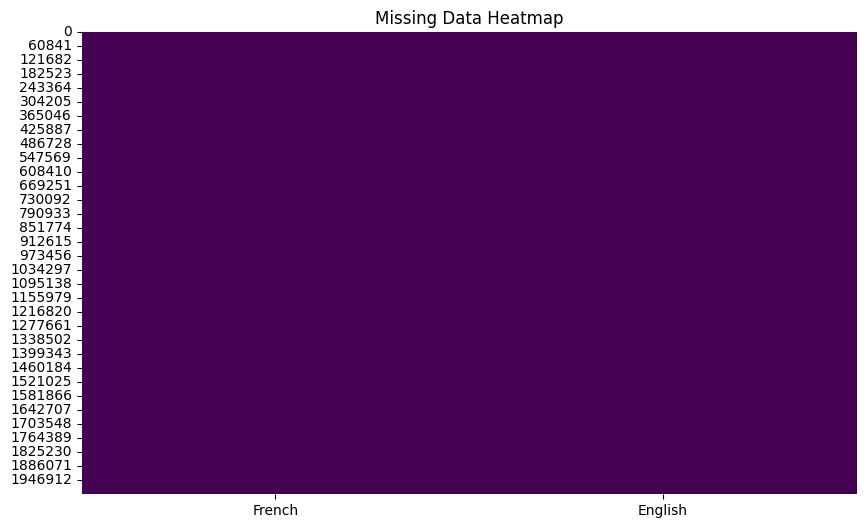

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

## Why This Is Important

### 1. Understanding Sentence Complexity
- **Long sentences** might indicate:
  - Complex translations.
  - Potential alignment issues between source and target sentences.
- **Short sentences** might lack meaningful content or context.

### 2. Comparison Between Languages
- Helps analyze whether translations tend to expand or condense the content:
  - **French** sentences might be longer due to grammatical structure.
  - **English** sentences might be shorter and more concise.

### 3. Identifying Outliers
- Sentences that are unusually short or long compared to the average can indicate:
  - Errors, such as truncated or incomplete translations.
  - Outliers that may need manual correction or special handling.

### 4. Feature Engineering
- Sentence lengths can be used as features in downstream tasks, such as:
  - Training a language translation model.
  - Detecting sentence alignment issues.
  - Building models to predict translation quality.


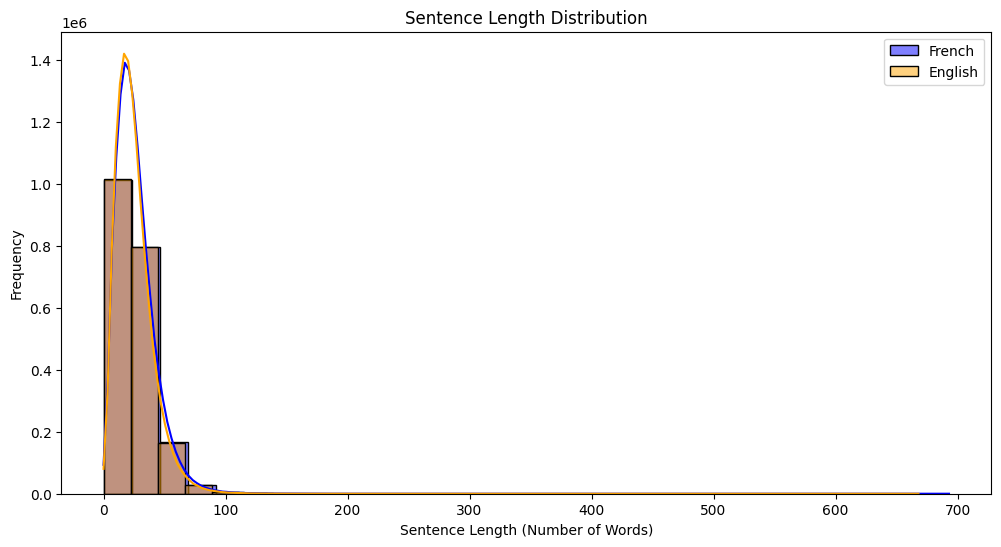

In [16]:
# 3. Language Distribution (French and English Sentence Lengths)
# Calculate sentence lengths
df['French_Length'] = df['French'].apply(lambda x: len(str(x).split()))
df['English_Length'] = df['English'].apply(lambda x: len(str(x).split()))

# Plot sentence length distributions
plt.figure(figsize=(12, 6))
sns.histplot(df['French_Length'], kde=True, color='blue', label='French', bins=30)
sns.histplot(df['English_Length'], kde=True, color='orange', label='English', bins=30)
plt.legend()
plt.title("Sentence Length Distribution")
plt.xlabel("Sentence Length (Number of Words)")
plt.ylabel("Frequency")
plt.show()